# Iris Flower Data Analysis

In [ ]:
!pip install opendatasets --upgrade --quiet

In [6]:
import numpy as np
import pandas as pd
import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns

# Download The Data

In [8]:
dataset_ur = 'httpds://www.kaggle.com/datasets/arunjangir245/irisraw'
od.download(dataset_ur)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  DDFD


Your Kaggle Key:

  ········


Dataset URL: https://www.kaggle.com/datasets/arunjangir245/irisraw


In [8]:
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
data_file = 'iris//irisdata.csv'
df = pd.read_csv(data_file)
df.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Data Preparetion

In [10]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
new_df = df.select_dtypes(include=numerics)
print(new_df)
len(new_df.columns)

     sepal length  sepal width  petal length  petal width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


4

In [14]:
missing_percent = df.isnull().sum().sort_values(ascending=False)/len(df)
missing_percent

sepal length    0.0
sepal width     0.0
petal length    0.0
petal width     0.0
species         0.0
dtype: float64

Visualzation Dataset

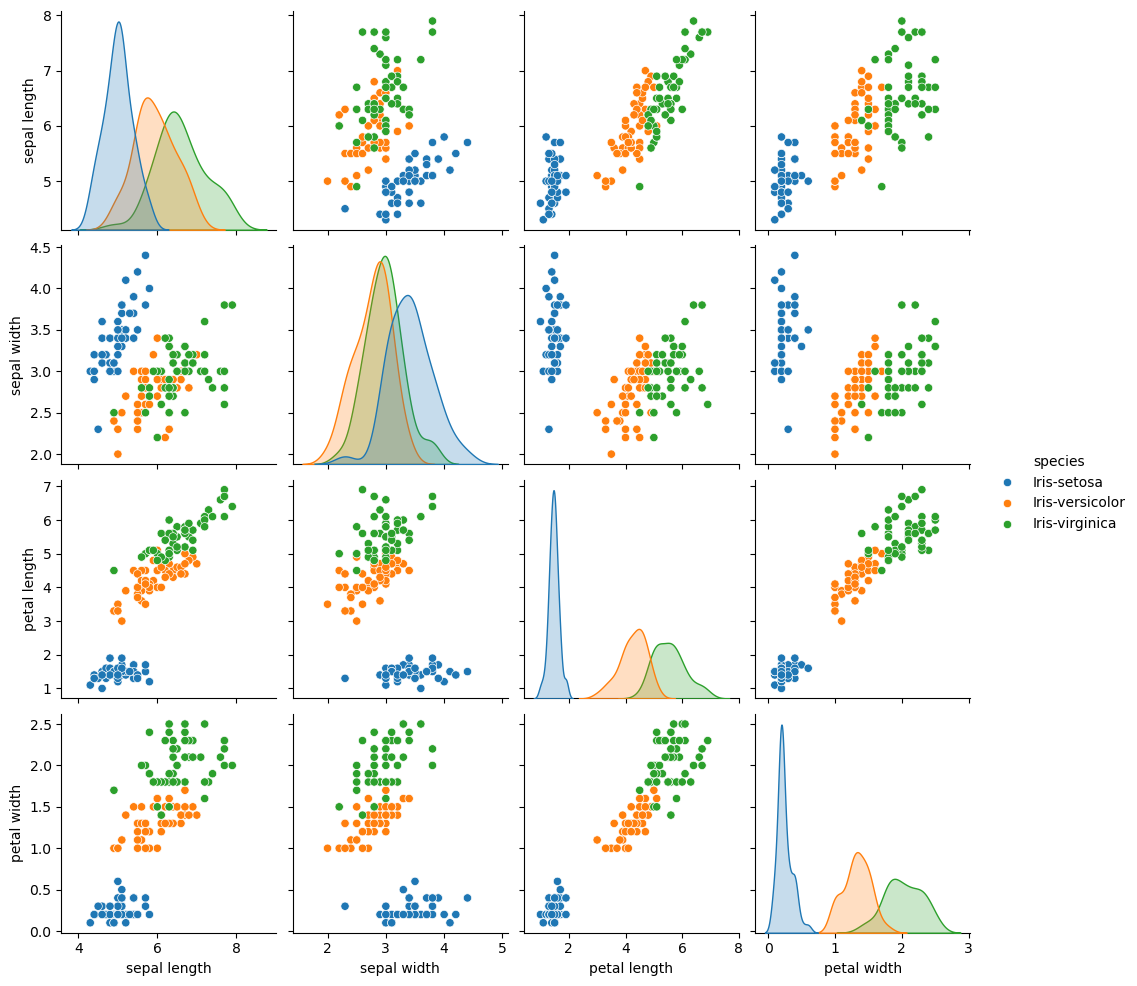

In [16]:
sns.pairplot(df,hue='species')

Separate input columns & output columns

In [176]:
data = df.values
X = data[:,:4]
y = data[:,4]

Splitting the data in training set & test set

In [178]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)
print(len(X_train))
len(X_test)

112


38

# Model 1 Linear Regession

In [180]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [182]:
# Featrue Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [184]:
# Train model with Logistic Regession
model = LogisticRegression(max_iter=200)
model.fit(X_train,y_train)

LogisticRegression(max_iter=200)

Check Prediction

In [207]:
y_pred = model.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred)*100)
for i in range(len(y_pred)):
    print(y_pred[i],y_test[i])

Accuracy: 100.0


In [209]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38



In [211]:
X_test_example_2 = [
    [4.9, 3.1, 1.5, 0.2],  # Iris-setosa
    [6.7, 3.1, 4.4, 1.4],  # Iris-versicolor
    [7.4, 2.8, 6.1, 1.9],  # Iris-virginica
    [5.6, 2.9, 4.5, 1.5]   # Iris-versicolor
]
X_test_example_2 = scaler.transform(X_test_example_2)
predict_test = model.predict(X_test_example_2)
for i in range(len(predict_test)):
    print(predict_test[i])

Iris-setosa
Iris-versicolor
Iris-virginica
Iris-versicolor
